In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import appropriate libraries 

import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

In [ ]:
# Load the combined review-calander-listing csv file
datapath = '/content/drive/MyDrive/Semester 3/Advanced Business Analytics/DSBA 6211 Group Project/'

df = pd.read_csv(datapath + 'review-calendar-listing.csv')

# Just some EDA

In [ ]:
df.keys() # Column names in the df dataframe

Index(['listing_id', 'date', 'reviewer_id', 'comments', 'month', 'year',
       'book_month', 'book_year', 'price', 'description',
       'neighborhood_overview', 'host_id', 'host_since', 'host_is_superhost',
       'host_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'amenities', 'list_price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'arch_year', 'arch_month'],
      dtype='object')

In [ ]:
df.head(2) # Head of the df dataframe

,listing_id,date,reviewer_id,comments,month,year,book_month,book_year,price,description,neighborhood_overview,host_id,host_since,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,list_price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,arch_year,arch_month
0,38585,2019-02-18,32684631,This place is exactly as described! Beautiful ...,2,2019,4.0,2018.0,48.0,Per the City Council of Asheville. Due to the ...,Our North Asheville neighborhood stretches alo...,165529,2010-07-13,t,1.0,28804,35.651459,-82.627918,House,Private room,2,1.0,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",$50.00,2,5,109,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1.2,2018,4
1,38585,2019-03-17,29068860,The check in process and communication and spa...,3,2019,4.0,2018.0,45.0,Per the City Council of Asheville. Due to the ...,Our North Asheville neighborhood stretches alo...,165529,2010-07-13,t,1.0,28804,35.651459,-82.627918,House,Private room,2,1.0,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",$50.00,2,5,109,96.0,10.0,10.0,10.0,10.0,9.0,10.0,1.2,2018,4


In [ ]:
# Find the unique number of combinations of listing_id, date and reviewer_id

(df.groupby(['listing_id','date','reviewer_id']).size().reset_index().rename(columns={0:'count'})['count'] > 1).sum()

0

In [ ]:
# Print the combinations from above cell

df.groupby(['listing_id','date','reviewer_id']).size().reset_index().rename(columns={0:'count'})

,listing_id,date,reviewer_id,count
0,38585,2019-02-18,32684631,1
1,38585,2019-03-17,29068860,1
2,38585,2019-04-14,5223197,1
3,38585,2019-04-21,99770472,1
4,38585,2019-05-04,40320887,1
...,...,...,...,...
121868,46848077,2020-12-24,378695064,1
121869,46848077,2020-12-26,35155166,1
121870,46848077,2020-12-30,75015818,1
121871,46901035,2020-12-21,50932595,1


In [ ]:
df.shape # Shape of the df dataframe

(121873, 37)

# Word Cloud

In [ ]:
#revw20 = df[df['year'] == 2020]['comments'].values
#text20 = ' '.join(str(x) for x in revw20)

# create a new dataset that has only 2020 data

reviews20 = df[df['year']==2020]

#Clean the comments column and remove empty rows
reviews20['comments'] = reviews20['comments'].str.lower()
reviews20 = reviews20[reviews20['comments'].notna()]
#Clean the comments column and split the sentence to individual words
something = reviews20['comments'].str.split(' ')

everything_cleaned = []

#Remove punctuation
for text in something:
    text = [x.strip(string.punctuation) for x in text]
    everything_cleaned.append(text)
#Join the word strings to create on unified list of words
text_everything = [" ".join(text) for text in everything_cleaned]
final_text = " ".join(text_everything)

#Tokenize the words 
tokens = nltk.word_tokenize(final_text)
#Take only words (not punctuation)
token_words = [w for w in tokens if w.isalpha()]

#Stem the words 
stemmed_list = [stemming.stem(word) for word in token_words]
# Join the inividual stemmed words into a list again
joined_words = ( " ".join(stemmed_list))

In [ ]:
# Word cloud of reviews for year 2020

from wordcloud import WordCloud
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


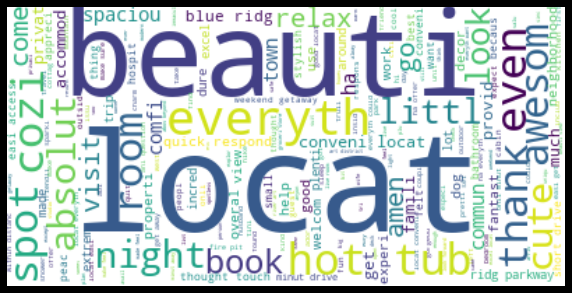

In [ ]:
additional_stopwords = ['us','stay','great','place','location','ashevil','clean','downtown','space',
                'perfect','recommend','host','love','comfort','everything','house','homee','close',
                'nice', 'definitely','need','us','beautiful','enjoy','easily','super','walk','bed',
                'time','wonder','back','comfort', 'love','home','stay','easier','wonder','area',
                'enjoy','well', 'high', 'need','amaz','quiet','just','apart','minute','amazing','one','like',
                'also','Airbnb','would','needed','wa','veri','hous','thi','definit','realli','highli']

stopwords = set(stopwords.words('english'))
all_stop_words = stopwords.union(list(additional_stopwords))

wordcloud20 = WordCloud(stopwords = all_stop_words, width=400, height=200, max_words=200, margin=0, background_color="white", prefer_horizontal = -1).generate(joined_words)

plt.figure(figsize=(10,7), facecolor='k')
plt1 = plt.imshow(wordcloud20, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# create a new dataset that has only 2019 data

reviews19 = df[df['year']==2019]

#Clean the comments column and remove empty rows
reviews19['comments'] = reviews19['comments'].str.lower()
reviews19 = reviews19[reviews19['comments'].notna()]
#Clean the comments column and split the sentence to individual words
something1 = reviews19['comments'].str.split(' ')

everything_cleaned1 = []

#Remove punctuation
for text in something1:
    text = [x.strip(string.punctuation) for x in text]
    everything_cleaned1.append(text)
#Join the word strings to create on unified list of words
text_everything1 = [" ".join(text) for text in everything_cleaned1]
final_text1 = " ".join(text_everything1)

#Tokenize the words 
tokens1 = nltk.word_tokenize(final_text1)
#Take only words (not punctuation)
token_words1 = [w for w in tokens1 if w.isalpha()]

#Stem the words 
stemmed_list1 = [stemming.stem(word) for word in token_words1]
# Join the inividual stemmed words into a list again
joined_words1 = ( " ".join(stemmed_list1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


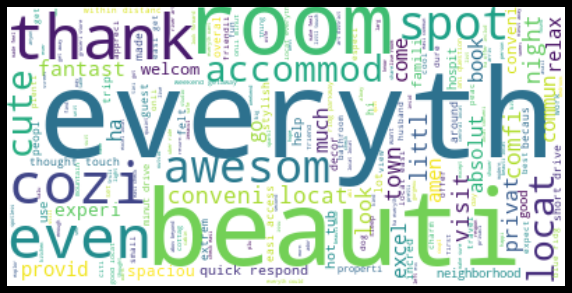

In [ ]:
# Wordcloud of reviews year 2019
additional_stopwords = ['us','stay','great','place','location','ashevil','clean','downtown','space',
                'perfect','recommend','host','love','comfort','everything','house','homee','close',
                'nice', 'definitely','need','us','beautiful','enjoy','easily','super','walk','bed',
                'time','wonder','back','comfort', 'love','home','stay','easier','wonder','area',
                'enjoy','well', 'high', 'need','amaz','quiet','just','apart','minute','amazing','one','like',
                'also','Airbnb','would','needed','wa','veri','hous','thi','definit','realli','highli']

wordcloud20 = WordCloud(stopwords = all_stop_words, width=400, height=200, max_words=200, margin=0, background_color="white", prefer_horizontal = -1).generate(joined_words1)

plt.figure(figsize=(10,7), facecolor='k')
plt1 = plt.imshow(wordcloud20,interpolation='bilinear')
plt.axis("off")
plt.show()

# Vader Sentiment Analysis

In [ ]:
!pip install vaderSentiment # install library vader for sentiment analysis

     |████████████████████████████████| 133kB 15.9MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import string
import nltk

sentiment = SentimentIntensityAnalyzer()
df['comments'] = df['comments'].str.lower().str.replace('[^a-z ]', '')
df['label'] = np.nan

# create functions to calculate compound, positve, negative, neutral, label and sentiment scroes for reviews

sentiment = SentimentIntensityAnalyzer()
def get_label(text):
  c = sentiment.polarity_scores(text)['compound']
  if c > 0:
    return 1
  else:
    return 0

def get_compound(text):
  c = sentiment.polarity_scores(text)['compound']
  return(c)

def get_pos(text):
  c = sentiment.polarity_scores(text)['pos']
  return(c)

def get_neg(text):
  c = sentiment.polarity_scores(text)['neg']
  return(c)

def get_neu(text):
  c = sentiment.polarity_scores(text)['neu']
  return(c)

def get_sentiment(text):
  c = sentiment.polarity_scores(text)['compound']
  if c > 0:
    return('pos')
  if c == 0:
    return('neu')
  if c < 0:
    return('neg')

In [ ]:
# Apply the function from above cell to create column for compound, neg, pos, neu, label and sentiment scroes for each row in the dataframe

df_new = df.copy()
df_new['label'] = df_new['comments'].apply(lambda x: get_label(x) if pd.notnull(x) else np.nan)
df_new['compound'] = df_new['comments'].apply(lambda x: get_compound(x) if pd.notnull(x) else np.nan)
df_new['neg'] = df_new['comments'].apply(lambda x: get_neg(x) if pd.notnull(x) else np.nan)
df_new['pos'] = df_new['comments'].apply(lambda x: get_pos(x) if pd.notnull(x) else np.nan)
df_new['neu'] = df_new['comments'].apply(lambda x: get_neu(x) if pd.notnull(x) else np.nan)
df_new['sentiment'] = df_new['comments'].apply(lambda x: get_sentiment(x) if pd.notnull(x) else np.nan)

In [ ]:
df_new[['comments','label','compound','neg','pos','neu','sentiment']] # display selected columns

,comments,label,compound,neg,pos,neu,sentiment
0,this place is exactly as described beautiful v...,1.0,0.9885,0.000,0.335,0.665,pos
1,the check in process and communication and spa...,1.0,0.9932,0.000,0.264,0.736,pos
2,evelyne was a delightful friendly host who was...,1.0,0.9552,0.000,0.285,0.715,pos
3,one of the best air bnb experiences ive had so...,1.0,0.9811,0.000,0.421,0.579,pos
4,evelyn is a great hostess she took the time to...,1.0,0.9802,0.011,0.189,0.800,pos
...,...,...,...,...,...,...,...
121868,my first time using airbnb and staying at rutl...,1.0,0.6697,0.035,0.110,0.854,pos
121869,i recommend staying here i would stay there ag...,1.0,0.6908,0.000,0.078,0.922,pos
121870,this is a nice quiet get away convenient to st...,1.0,0.8442,0.035,0.270,0.696,pos
121871,devin was an amazing host and very responsive ...,1.0,0.9216,0.000,0.223,0.777,pos


In [ ]:
(df_new['label'] <1).sum() # number of columns that have label less than 1

2568

In [ ]:
df_new.to_csv('/content/drive/MyDrive/Semester 3/Advanced Business Analytics/DSBA 6211 Group Project/sentimentDataset.csv')